# Loading the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/Drug Efficacy - Dataset (1).csv')

In [ ]:
tab = pd.crosstab(data['drug_s']==1, data['pneumonia'])
stats.chi2_contingency(tab)

(13.72905859526507,
 0.00021116198121411147,
 1,
 array([[14507.6859731,   767.3140269],
        [ 2792.3140269,   147.6859731]]))

In [ ]:
#setting up the dataframe for testing data difference
drug_d_age = data[data['drug_s'] == 0]['index_age']
drug_s_age = data[data['drug_s'] == 1]['index_age']

In [ ]:
mannwhitneyu(drug_d_age, drug_s_age)

MannwhitneyuResult(statistic=21738938.5, pvalue=0.0061385387930819055)

# Loading the dataset

In [ ]:
data=pd.read_csv('/content/Drug Efficacy - Dataset (1).csv')

In [ ]:
data.head()

,patid,index_age,previous_asthma_drugs,total_pre_index_cannisters_365,post_index_exacerbations365,pneumonia,sinusitis,acute_bronchitis,acute_laryngitis,upper_respiratory_infection,...,rhinitis,adherence,total_pre_index_charge,pre_asthma_days,pre_asthma_charge,pre_asthma_pharma_charge,drug_s,female,log_charges,log_asthma_charge
0,1073754155,14,1,1,0,0,0,1,0,1,...,0,0.084469,1224.767473,1,314.0,218.13,0,0,7.110506,5.385091
1,1073799394,21,1,2,2,0,1,1,0,0,...,1,0.084469,20290.534269,0,0.0,44.98,0,0,9.917910,3.806218
2,1073854918,62,1,0,0,0,0,0,0,0,...,0,0.738420,2964.254175,4,480.0,99.26,0,0,7.994381,4.597743
3,1073898249,30,1,2,0,0,0,1,0,1,...,0,0.084469,3223.708820,0,0.0,59.58,0,1,8.078288,4.087320
4,1073913003,40,1,1,0,0,1,0,1,1,...,1,0.506812,1287.254368,2,689.0,29.79,0,0,7.160267,3.394173


In [ ]:
data['post_index_exacerbations365'].value_counts()

0     16124
1      1525
2       333
3       115
4        48
5        32
6        12
8         9
7         9
9         3
10        2
12        1
13        1
14        1
Name: post_index_exacerbations365, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


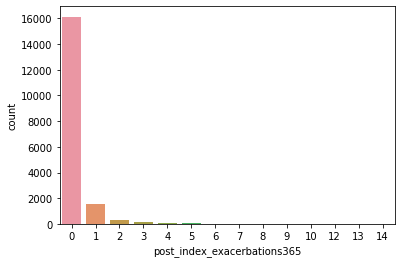

In [ ]:
sns.countplot(data['post_index_exacerbations365'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


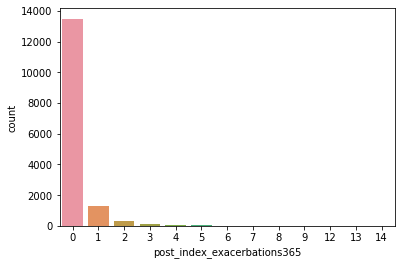

In [ ]:
sns.countplot(data[data['drug_s']==0]['post_index_exacerbations365'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


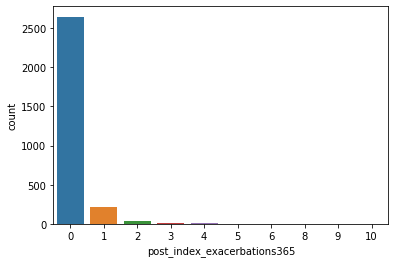

In [ ]:
sns.countplot(data[data['drug_s']==1]['post_index_exacerbations365'])

In [ ]:
data.info()
#total 18125 non null values for each variable
#we can see that factor variables have been treated as numeric variables and hence we convert them to factor variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18215 entries, 0 to 18214
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patid                           18215 non-null  int64  
 1   index_age                       18215 non-null  int64  
 2   previous_asthma_drugs           18215 non-null  int64  
 3   total_pre_index_cannisters_365  18215 non-null  int64  
 4   post_index_exacerbations365     18215 non-null  int64  
 5   pneumonia                       18215 non-null  int64  
 6   sinusitis                       18215 non-null  int64  
 7   acute_bronchitis                18215 non-null  int64  
 8   acute_laryngitis                18215 non-null  int64  
 9   upper_respiratory_infection     18215 non-null  int64  
 10  gerd                            18215 non-null  int64  
 11  rhinitis                        18215 non-null  int64  
 12  adherence                       

In [ ]:
(data.columns)

Index(['patid', 'index_age', 'previous_asthma_drugs',
       'total_pre_index_cannisters_365', 'post_index_exacerbations365',
       'pneumonia', 'sinusitis', 'acute_bronchitis', 'acute_laryngitis',
       'upper_respiratory_infection', 'gerd', 'rhinitis', 'adherence',
       'total_pre_index_charge', 'pre_asthma_days', 'pre_asthma_charge',
       'pre_asthma_pharma_charge', 'drug_s', 'female', 'log_charges',
       'log_asthma_charge'],
      dtype='object')

In [ ]:
data['acute_bronchitis']=data['acute_bronchitis'].astype(object)
data['acute_laryngitis']=data['acute_laryngitis'].astype(object)
data['female']=data['female'].astype(object)
data['gerd']=data['gerd'].astype(object)
data['pneumonia']=data['pneumonia'].astype(object)
data['rhinitis']=data['rhinitis'].astype(object)
data['sinusitis']=data['sinusitis'].astype(object)
data['upper_respiratory_infection']=data['upper_respiratory_infection'].astype(object)
data['drug_s']=data['drug_s'].astype(object)

In [ ]:
cols = len(data.axes[1])
cols

21

In [ ]:
data['patid'].nunique()
#all patient ids are unique hence in total we have 18215 patients

18215

In [ ]:
data.describe() 

,patid,index_age,previous_asthma_drugs,total_pre_index_cannisters_365,post_index_exacerbations365,adherence,total_pre_index_charge,pre_asthma_days,pre_asthma_charge,pre_asthma_pharma_charge,log_charges,log_asthma_charge
count,1.821500e+04,18215.000000,18215.0,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000,18215.000000
mean,1.317073e+09,38.304639,1.0,0.793741,0.174636,0.249604,8524.835020,1.414768,547.894775,244.820223,7.984189,4.200143
std,1.545708e+08,15.218165,0.0,0.723497,0.633318,0.227596,21011.123711,2.457226,1940.953263,448.771943,1.649031,1.710356
min,1.073754e+09,12.000000,1.0,0.000000,0.000000,0.005450,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.183442e+09,26.000000,1.0,0.000000,0.000000,0.084469,1227.034917,0.000000,0.000000,21.410000,7.112356,3.063858
50%,1.282389e+09,41.000000,1.0,1.000000,0.000000,0.168937,3154.941039,1.000000,130.000000,46.300000,8.056725,3.835142
75%,1.493699e+09,50.000000,1.0,1.000000,0.000000,0.337875,8142.123760,2.000000,410.085000,229.560000,9.004806,5.436164
max,1.771899e+09,65.000000,1.0,2.000000,14.000000,1.000000,875872.580590,71.000000,79280.910000,5463.140000,13.682976,8.605779


# EDA

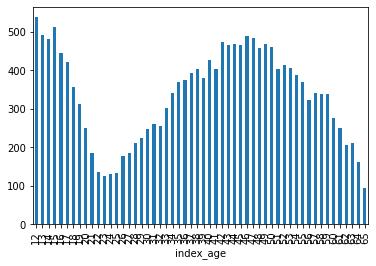

In [ ]:
#Age Barplot
data.groupby(by='index_age').count()['patid'].plot(kind='bar')
# age has a bi-modal distribution

Text(0.5, 1.0, 'Gender Distribution of Patients')

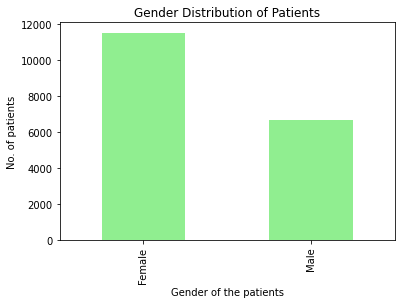

In [ ]:
#Gender Split

data1=data.copy()

def gender(s):
    dummy=[]
    for i in s:
        if i==0: dg='Male'
        else: dg='Female'
        dummy.append(dg)
    return dummy

data1['female']=gender(data1['female'])

data1.groupby(by='female').count()['patid'].plot(kind='bar',color='lightgreen')
plt.xlabel('Gender of the patients')
plt.ylabel('No. of patients')
plt.title('Gender Distribution of Patients')

Text(0.5, 1.0, 'Drug Distribution of Patients')

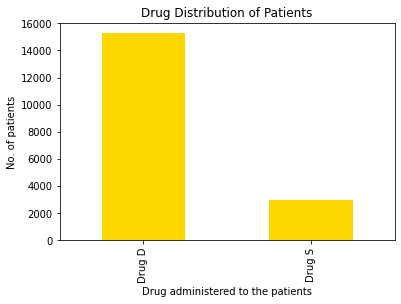

In [ ]:
#Drug Split

data1=data.copy()

def drug(s):
    dummy=[]
    for i in s:
        if i==0: dg='Drug D'
        else: dg='Drug S'
        dummy.append(dg)
    return dummy

data1['drug_s']=drug(data1['drug_s'])

data1.groupby(by='drug_s').count()['patid'].plot(kind='bar',color='gold')
plt.xlabel('Drug administered to the patients')
plt.ylabel('No. of patients')
plt.title('Drug Distribution of Patients')

In [ ]:
from scipy import stats 
#library for stats 

In [ ]:
#setting up the dataframe for testing data difference
drug_d_age = data[data['drug_s'] == 0]['index_age']
drug_s_age = data[data['drug_s'] == 1]['index_age']

In [ ]:
from scipy.stats import shapiro
shapiro(drug_d_age)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9458305835723877, pvalue=0.0)

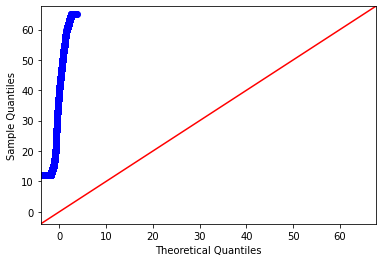

In [ ]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(drug_d_age, line ='45')
py.show()

In [ ]:
from scipy.stats import mannwhitneyu 
mannwhitneyu(drug_d_age, drug_s_age)

MannwhitneyuResult(statistic=21738938.5, pvalue=0.0061385387930819055)

# T-Test for Charges

**Pharma Charges**

In [ ]:
#setting up the dataframe for testing data difference
drug_d_pc = data[data['drug_s'] == 0]['pre_asthma_pharma_charge']
drug_s_pc = data[data['drug_s'] == 1]['pre_asthma_pharma_charge']

In [ ]:
drug_d_pc.head(10)
drug_s_pc.head(10)

15275     778.29
15276     255.38
15277     129.79
15278      43.96
15279    1010.78
15280    1233.89
15281    1029.75
15282      46.58
15283     976.46
15284     442.80
Name: pre_asthma_pharma_charge, dtype: float64

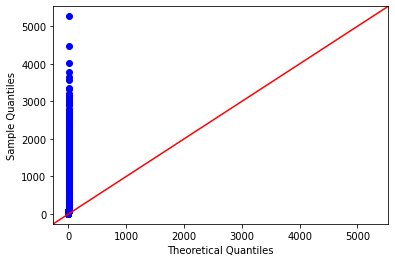

In [ ]:
sm.qqplot(drug_d_pc, line ='45')
py.show()

In [ ]:
from scipy.stats import mannwhitneyu 
mannwhitneyu(drug_d_pc, drug_s_pc)

MannwhitneyuResult(statistic=14378935.0, pvalue=2.0241338507933482e-210)

**Non Pharma Charges**

In [ ]:
#setting up the dataframe for testing data difference
drug_d_npc = data[data['drug_s'] == 0]['pre_asthma_charge']
drug_s_npc = data[data['drug_s'] == 1]['pre_asthma_charge']
drug_d_npc.head(10)
drug_s_npc.head(10)

15275     194.00
15276     399.50
15277       0.00
15278    1459.00
15279     110.00
15280       0.00
15281     133.00
15282    1915.18
15283     301.00
15284      13.52
Name: pre_asthma_charge, dtype: float64

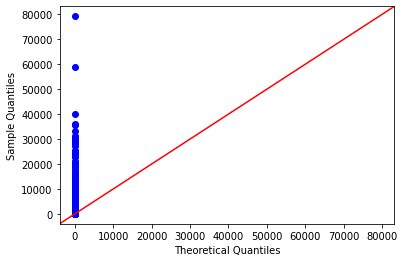

In [ ]:
sm.qqplot(drug_d_npc, line ='45')
py.show()

In [ ]:
from scipy.stats import mannwhitneyu 
mannwhitneyu(drug_d_npc, drug_s_npc)

MannwhitneyuResult(statistic=16898751.5, pvalue=2.9308217622560846e-105)

# Rough Codes

In [ ]:
new_data=data.copy()
new_data.head()

,patid,index_age,previous_asthma_drugs,total_pre_index_cannisters_365,post_index_exacerbations365,pneumonia,sinusitis,acute_bronchitis,acute_laryngitis,upper_respiratory_infection,...,rhinitis,adherence,total_pre_index_charge,pre_asthma_days,pre_asthma_charge,pre_asthma_pharma_charge,drug_s,female,log_charges,log_asthma_charge
0,1073754155,14,1,1,0,0,0,1,0,1,...,0,0.084469,1224.767473,1,314.0,218.13,0,0,7.110506,5.385091
1,1073799394,21,1,2,2,0,1,1,0,0,...,1,0.084469,20290.534269,0,0.0,44.98,0,0,9.917910,3.806218
2,1073854918,62,1,0,0,0,0,0,0,0,...,0,0.738420,2964.254175,4,480.0,99.26,0,0,7.994381,4.597743
3,1073898249,30,1,2,0,0,0,1,0,1,...,0,0.084469,3223.708820,0,0.0,59.58,0,1,8.078288,4.087320
4,1073913003,40,1,1,0,0,1,0,1,1,...,1,0.506812,1287.254368,2,689.0,29.79,0,0,7.160267,3.394173


In [ ]:
def AG(age):
    dummy=[]
    for i in age:
        if i<15: grp='0-14'
        elif i<30: grp='15-29'
        elif i<45: grp='30-44'
        elif i<60: grp='45-59'
        else: grp='60-74'
        dummy.append(grp)
    return dummy

new_data['age_group']=AG(new_data['index_age'])

In [ ]:
def response(pie_365):
    dummy=[]
    for i in pie_365:
        if i==0: r=0
        else: r=1
        dummy.append(r)
    return dummy

new_data['post_index_exc_bin']=response(new_data['post_index_exacerbations365'])

In [ ]:
def pre_as(pac):
    dummy=[]
    for i in pac:
        if i==0: d=0
        elif i==1: d=1
        else: d=2
        dummy.append(d)
    return dummy

new_data['pre_asthma_days_bin']=pre_as(new_data['pre_asthma_days'])

In [ ]:
new_data.head()

,patid,index_age,previous_asthma_drugs,total_pre_index_cannisters_365,post_index_exacerbations365,pneumonia,sinusitis,acute_bronchitis,acute_laryngitis,upper_respiratory_infection,...,pre_asthma_days,pre_asthma_charge,pre_asthma_pharma_charge,drug_s,female,log_charges,log_asthma_charge,age_group,post_index_exc_bin,pre_asthma_days_bin
0,1073754155,14,1,1,0,0,0,1,0,1,...,1,314.0,218.13,0,0,7.110506,5.385091,0-14,0,1
1,1073799394,21,1,2,2,0,1,1,0,0,...,0,0.0,44.98,0,0,9.917910,3.806218,15-29,1,0
2,1073854918,62,1,0,0,0,0,0,0,0,...,4,480.0,99.26,0,0,7.994381,4.597743,60-74,0,2
3,1073898249,30,1,2,0,0,0,1,0,1,...,0,0.0,59.58,0,1,8.078288,4.087320,30-44,0,0
4,1073913003,40,1,1,0,0,1,0,1,1,...,2,689.0,29.79,0,0,7.160267,3.394173,30-44,0,2


In [ ]:
new_data.to_csv('/content/new-data.csv')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age Distribution of Patients')

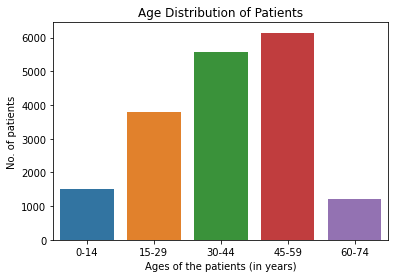

In [ ]:
sns.countplot(sorted(new_data['age_group']))
plt.xlabel('Ages of the patients (in years)')
plt.ylabel('No. of patients')
plt.title('Age Distribution of Patients')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution of Patients')

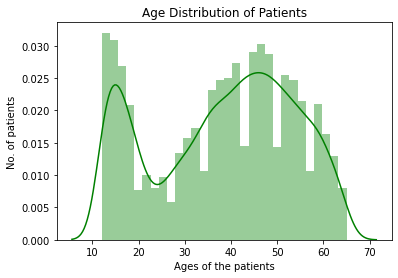

In [ ]:
sns.distplot(sorted(new_data['index_age']),color='green')
plt.xlabel('Ages of the patients')
plt.ylabel('No. of patients')
plt.title('Age Distribution of Patients')

In [ ]:
dplot=pd.DataFrame(new_data['age_group'].value_counts())
dplot=dplot.sort_index()
dplot

,age_group
0-14,1512
15-29,3800
30-44,5560
45-59,6145
60-74,1198


Text(0.5, 1.0, 'Age Distribution of Patients')

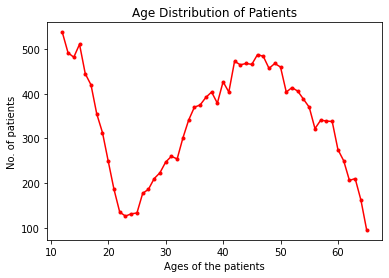

In [ ]:
data.groupby(by='index_age').count()['patid'].plot(color='red',marker='.')
plt.xlabel('Ages of the patients')
plt.ylabel('No. of patients')
plt.title('Age Distribution of Patients')

# Feature Selection

In [ ]:
y=new_data[['post_index_exc_bin']]
x=new_data[['index_age',
 'total_pre_index_cannisters_365',
 'pneumonia',
 'sinusitis',
 'acute_bronchitis',
 'acute_laryngitis',
 'upper_respiratory_infection',
 'gerd',
 'rhinitis',
 'drug_s',
 'female','pre_asthma_days_bin']]

In [ ]:
x = x.astype(str)
y = y.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# summarize
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (14572, 12) (14572, 1)
Test (3643, 12) (3643, 1)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# prepare input data
def prepare_inputs(x_train, x_test):
 oe = OrdinalEncoder()
 oe.fit(x_train)
 x_train_enc = oe.transform(x_train)
 x_test_enc = oe.transform(x_test)
 return x_train_enc, x_test_enc

In [ ]:
from sklearn.preprocessing import LabelEncoder
# prepare target
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

In [ ]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [ ]:
# prepare input data
x_train_enc, x_test_enc = prepare_inputs(x_train, x_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [ ]:
x_train_fs, x_test_fs, fs = select_features(x_train_enc, y_train_enc, x_test_enc)

Feature 0: 65.469796
Feature 1: 0.003219
Feature 2: 3.909636
Feature 3: 3.243201
Feature 4: 18.037853
Feature 5: 4.030667
Feature 6: 4.571595
Feature 7: 8.159614
Feature 8: 3.843362
Feature 9: 6.996502
Feature 10: 10.957536
Feature 11: 15.530376


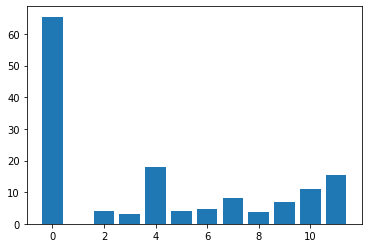

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
pd.DataFrame(fs.scores_,x.columns)

,0
index_age,65.469796
total_pre_index_cannisters_365,0.003219
pneumonia,3.909636
sinusitis,3.243201
acute_bronchitis,18.037853
acute_laryngitis,4.030667
upper_respiratory_infection,4.571595
gerd,8.159614
rhinitis,3.843362
drug_s,6.996502


# Model Built Using Chi-Squared Features


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(x_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.77


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# feature selection
def select_features(x_train, y_train, x_test):
 fs = SelectKBest(score_func=chi2, k=4)
 fs.fit(x_train, y)
 x_train_fs = fs.transform(x_train)
 x_test_fs = fs.transform(x_test)
 return x_train_fs, x_test_fs

#Cleaned Data (Bias Removed)

In [ ]:
clean_data=pd.read_csv('/content/example.csv')

In [ ]:
clean_data.head()

,7920,1285660501,15,1,1.1,0,0.1,0.2,0.3,0.4,...,0.506820333,0.261057826,0.117,0.118,0.119,0.120,0.121,18.5438321,4.4711E-28,2.1
0,7920,1285660501,15,1,1,0,0,0,0,0,...,0.50682,0.261058,0,0.0,0.0,0.0,0.0,18.543832,4.471100e-28,2
1,7920,1285660501,15,1,1,0,0,0,0,0,...,0.50682,0.261058,0,0.0,0.0,0.0,0.0,18.543832,4.471100e-28,2
2,7920,1285660501,15,1,1,0,0,0,0,0,...,0.50682,0.261058,0,0.0,0.0,0.0,0.0,18.543832,4.471100e-28,2
3,7920,1285660501,15,1,1,0,0,0,0,0,...,0.50682,0.261058,0,0.0,0.0,0.0,0.0,18.543832,4.471100e-28,2
4,7920,1285660501,15,1,1,0,0,0,0,0,...,0.50682,0.261058,0,0.0,0.0,0.0,0.0,18.543832,4.471100e-28,2


In [ ]:
new=clean_data.copy()

In [ ]:
sns.distplot(sorted(clean_data['index_age']),color='green')
plt.xlabel('Ages of the patients')
plt.ylabel('No. of patients')
plt.title('Age Distribution of Patients')

KeyError: ignored

In [ ]:
y1=new[['post_index_exc_bin']]
x1=new[['index_age',
 'total_pre_index_cannisters_365',
 'pneumonia',
 'sinusitis',
 'acute_bronchitis',
 'acute_laryngitis',
 'upper_respiratory_infection',
 'gerd',
 'rhinitis',
 'drug_s',
 'female','pre_asthma_days_bin']]

In [ ]:
new['age_group']=AG(new['index_age'])
new['post_index_exc_bin']=response(new['post_index_exacerbations365'])
new['pre_asthma_days_bin']=pre_as(new['pre_asthma_days'])

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

In [ ]:
# summarize
print('Train', x1_train.shape, y1_train.shape)
print('Test', x1_test.shape, y1_test.shape)

Train (14572, 12) (14572, 1)
Test (3643, 12) (3643, 1)


In [ ]:
# prepare input data
x1_train_enc, x1_test_enc = prepare_inputs(x1_train, x1_test)
# prepare output data
y1_train_enc, y1_test_enc = prepare_targets(y1_train, y1_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs1 = SelectKBest(score_func=chi2, k='all')
fs1.fit(x1_train, y1_train)
x1_train_fs = fs1.transform(x1_train)
x1_test_fs = fs1.transform(x1_test)

In [ ]:
x1_train_fs, x1_test_fs, fs1 = select_features(x1_train_enc, y1_train_enc, x1_test_enc)

ValueError: ignored

In [ ]:
pd.DataFrame(fs1.scores_,x1.columns)

,0
index_age,44.939166
total_pre_index_cannisters_365,0.003219
pneumonia,3.909636
sinusitis,3.243201
acute_bronchitis,18.037853
acute_laryngitis,4.030667
upper_respiratory_infection,4.571595
gerd,8.159614
rhinitis,3.843362
drug_s,6.996502


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# fit the model
model1 = LogisticRegression(solver='lbfgs')
model1.fit(x1_train_enc, y1_train_enc)
# evaluate the model
yhat = model1.predict(x1_test_enc)
# evaluate predictions
accuracy = accuracy_score(y1_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.77


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
